# Smoking and Drinking Dataset with body signal
### Group number: 36
### Submited by: Reuven Weltfried  -   Reuven Waldman - Eliran levi
#### Link: https://www.kaggle.com/datasets/sooyoungher/smoking-drinking-dataset
#### This dataset is collected from National Health Insurance Service in Korea. All personal information and sensitive data were excluded.¶




<a id='top'></a>

<div>
<img src="https://github.com/reuvenwel/project-1/blob/main/%D7%AA%D7%9E%D7%95%D7%A0%D7%94%20%D7%9C%D7%A4%D7%A8%D7%95%D7%99%D7%99%D7%A7%D7%98.jpg?raw=true" width="500"/>
</div>


<div style="height: 1px; width: 100%; border-top: 1px solid black;"></div>


## Introduction:

#### This project was written based on a medical dataset that contains physiological measures of group of subjects and also mentions whether each subject drinks or smokes.
#### In this project, we will examine relationships between different variables and try to draw conclusions based on an examination of the outcomes.

<div style="height: 1px; width: 100%; border-top: 1px solid black;"></div>

##  Relevant Libraries Import:


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



<div style="height: 1px; width: 100%; border-top: 1px solid black;"></div>

## Part One:

### Dataset examination and preparation

#### *Data frame view:*

In [35]:
url1 = "https://raw.githubusercontent.com/reuvenwel/project-1/main/project01.csv"
smoke_and_drink_df = pd.read_csv(url1, encoding="utf-8")
smoke_and_drink_df.head()

,A,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1,1,120,...,126,92,17.1,1,1.0,21,35,40,1,Y
1,Male,30,180,80,89.0,0.9,1.2,1,1,130,...,148,121,15.8,1,0.9,20,36,27,3,N
2,Male,40,165,75,91.0,1.2,1.5,1,1,120,...,74,104,15.8,1,0.9,47,32,68,1,N
3,Male,50,175,80,91.0,1.5,1.2,1,1,145,...,104,106,17.6,1,1.1,29,34,18,1,N
4,Male,50,165,60,80.0,1.0,1.2,1,1,138,...,117,104,13.8,1,0.8,19,12,25,1,N


#### *Columns view:*

In [37]:
smoke_and_drink_df.columns

Index(['A', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN'],
      dtype='object')

#### *Data frame shape view:*

In [39]:
smoke_and_drink_df.shape

(105696, 24)

#### *Columns details:*




<div dir="rtl" style="text-align: right;">

- **A**: מגדר   
- **age**:  גיל - מעוגל ל-5
- **height**: גובה - מעוגל ל-5
- **waistline**: קו מותניים
- **sight_left**: ראיה - 0.1 גרועה, 1 רגילה, מכאן ואילך זה רמות ראייה חריגות באיכותן עד 9.9
- **hear_left**: אחד טוב, שתיים לא 
- **SBP**: לחץ דם גבוה ביותר
- **DBP**: לחץ דם נמוך ביותר
- **BLDS**: גלוקוז בדם בצום
- **tot_chole**: סה"כ כולסטרול
- **HDL cholesterol**: כולסטרול טוב
- **LDL_chole**: כולסטרול רע
- **triglyceride**: טריגליצרידים הם צורת אחסון האנרגיה העיקרית בגוף - סוג של שומן הנמצא בדם ומשמש כמקור אנרגיה. אצל אדם בריא רמות הטריגליצרידים נשמרות תקינות ומאוזנות, אך כשרמת טריגליצרידים הופכת לגבוהה בדם (Hypertriglyceridemia) היא עלולה להגביר את הסיכון ללקות במחלות לב ולהוות סימפטום של תסמונת מטבולית כלשהי.
- **hemoglobin**: המוגלובין
- **urine_protein**: חלבון בשתן - כליות בריאות ומתפקדות לא מאפשרות לחלבון לעבור דרך המסננים שלהן. לכן, כאשר מתגלות בשתן כמויות חלבון לא רגילות, מה שבעגה מקצועית נקרא "פרוטאינוריה", סימן כי קיימת בעיה כלשהי, כאשר לרוב מדובר על נזק כלייתי.
- **serum_creatinine**: 
  - גברים: 0.67 עד 1.17 מיליגרם לדציליטר
  - נשים: 0.51 עד 0.95 מיליגרם לדציליטר
  - ערכי קריאטינין גבוהים מהנורמה עלולים להצביע על תפקוד לקוי של הכליות, אך חריגה קלה יכולה להיות גם תוצאה של התייבשות.
  - ערכי קריאטינין נמוכים מהנורמה עלולים להצביע על מחלות שריר מסוימות. תוצאה נמוכה עשויה להתקבל גם במצבים של מסת שריר נמוכה מאוד ובמצבים של תת־תזונה.
- **SGOT_AST**: אנזים זה מכונה גם טראנסאמינאז (SGOT) והוא נמצא בעיקר בכבד, בשריר הלב ובשרירים. תפקידו העיקרי של האנזים AST הוא מטבוליזם של החומצה האמינית אספארטאט. נזק לתאים המכילים אנזים זה יגרום לעליה ברמתו בדם.
- **SGOT_ALT**: הוא אנזים שמצוי בכבד וברקמות נוספות בגוף. האנזים משתחרר לדם כאשר נפגעים התאים שבהם הוא נמצא. פעילות האנזים גבוהה פי 10 בכבד בהשוואה לפעילותו ברקמות אחרות, ולכן עלייה בשיעורו בדם מעלה את החשד לקיומן של מחלות כבד.
- **gamma_GTP**: את רמת האנזים GGT (גמא־גלוטמיל טרנספפטידאז) בדם. האנזים מתרכז במיוחד בכבד, בדרכי המרה ובכליות. הוא משוחרר לדם כאשר תאים שמכילים אותו נפגעים. כאשר עולה חשד למחלה בכבד או בדרכי המרה או כדי לוודא שנטילת תרופות מסוימות אינה משפיעה לרעה על תפקוד הכבד.
- **SMK_stat_type_cd**: מצב עישון - 1 (לעולם לא), 2 (נהג לעשן אבל הפסיק), 3 (עדיין מעשן)
- **DRK_YN**: שותה או לא

</div>



#### *Columns type:*

In [43]:
smoke_and_drink_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105696 entries, 0 to 105695
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   A                 105696 non-null  object 
 1   age               105696 non-null  int64  
 2   height            105696 non-null  int64  
 3   weight            105696 non-null  int64  
 4   waistline         105696 non-null  float64
 5   sight_left        105696 non-null  float64
 6   sight_right       105696 non-null  float64
 7   hear_left         105696 non-null  int64  
 8   hear_right        105696 non-null  int64  
 9   SBP               105696 non-null  int64  
 10  DBP               105696 non-null  int64  
 11  BLDS              105696 non-null  int64  
 12  tot_chole         105696 non-null  int64  
 13  HDL_chole         105696 non-null  int64  
 14  LDL_chole         105696 non-null  int64  
 15  triglyceride      105696 non-null  int64  
 16  hemoglobin        10

#### *Missing values (NaNs) check:*

In [45]:
smoke_and_drink_df.isnull().sum()

A                   0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

##### There seem to be no missing values and we can work with all the data

#### *Column 'A' name changing:*

In [48]:
smoke_and_drink_df.rename(columns={'A':'Gender'}, inplace=True)


#### *Objects to Numbers:*

##### Changing objects into numbers in order to analyze the information more efectivly
##### We changed the Y and N on column 'DRK_YN' and 'Male' and 'Female' on column 'Gender' to 1 and 0 so they appear on the correlations map.

In [51]:
smoke_and_drink_df['DRK_YN'] = smoke_and_drink_df['DRK_YN'].map({'Y': 1, 'N': 0})
smoke_and_drink_df['Gender'] = smoke_and_drink_df['Gender'].map({'Male': 0, 'Female': 1})
smoke_and_drink_df

,Gender,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,0,35,170,75,90.0,1.0,1.0,1,1,120,...,126,92,17.1,1,1.0,21,35,40,1,1
1,0,30,180,80,89.0,0.9,1.2,1,1,130,...,148,121,15.8,1,0.9,20,36,27,3,0
2,0,40,165,75,91.0,1.2,1.5,1,1,120,...,74,104,15.8,1,0.9,47,32,68,1,0
3,0,50,175,80,91.0,1.5,1.2,1,1,145,...,104,106,17.6,1,1.1,29,34,18,1,0
4,0,50,165,60,80.0,1.0,1.2,1,1,138,...,117,104,13.8,1,0.8,19,12,25,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105691,1,60,150,50,75.0,1.0,0.8,1,1,130,...,66,93,12.4,1,0.5,25,14,10,1,0
105692,1,30,155,55,76.2,0.7,0.8,1,1,102,...,81,38,12.1,1,0.8,19,11,12,1,1
105693,0,65,165,65,82.0,0.4,0.9,1,1,133,...,154,87,14.0,1,1.0,30,22,20,1,1
105694,0,25,170,60,72.0,1.2,1.5,1,1,131,...,102,54,16.5,1,1.1,19,17,17,1,1


<div style="height: 1px; width: 100%; border-top: 1px solid black;"></div>

## Part Two:

### Data Exploration:

#### In this section, we will try to map and look for relationships between variables in our data

#### *Benchmarks:*

In [57]:
smoke_and_drink_df.describe()

,Gender,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
count,105696.000000,105696.000000,105696.000000,105696.000000,105696.000000,105696.000000,105696.000000,105696.000000,105696.000000,105696.000000,...,105696.000000,105696.000000,105696.000000,105696.000000,105696.000000,105696.000000,105696.000000,105696.000000,105696.000000,105696.000000
mean,0.468438,47.610174,162.263567,63.306275,81.259668,0.981420,0.981211,1.031288,1.030465,122.427367,...,113.013227,132.262744,14.230533,1.094649,0.859514,25.940745,25.738883,36.957189,1.611556,0.500341
std,0.499005,14.173750,9.276180,12.535107,11.836500,0.608456,0.616991,0.174095,0.171863,14.500863,...,38.008990,106.665497,1.580306,0.435250,0.409780,18.306402,23.715101,48.987411,0.819511,0.500002
min,0.000000,20.000000,130.000000,25.000000,35.000000,0.100000,0.100000,1.000000,1.000000,75.000000,...,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,1.000000,1.000000,112.000000,...,89.000000,74.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000,0.000000
50%,0.000000,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000,1.000000
75%,1.000000,60.000000,170.000000,70.000000,88.000000,1.200000,1.200000,1.000000,1.000000,131.000000,...,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,30.000000,39.000000,2.000000,1.000000
max,1.000000,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,2.000000,2.000000,232.000000,...,5119.000000,9490.000000,21.000000,6.000000,81.000000,1911.000000,2309.000000,999.000000,3.000000,1.000000


#### *correlation Heatmap:*

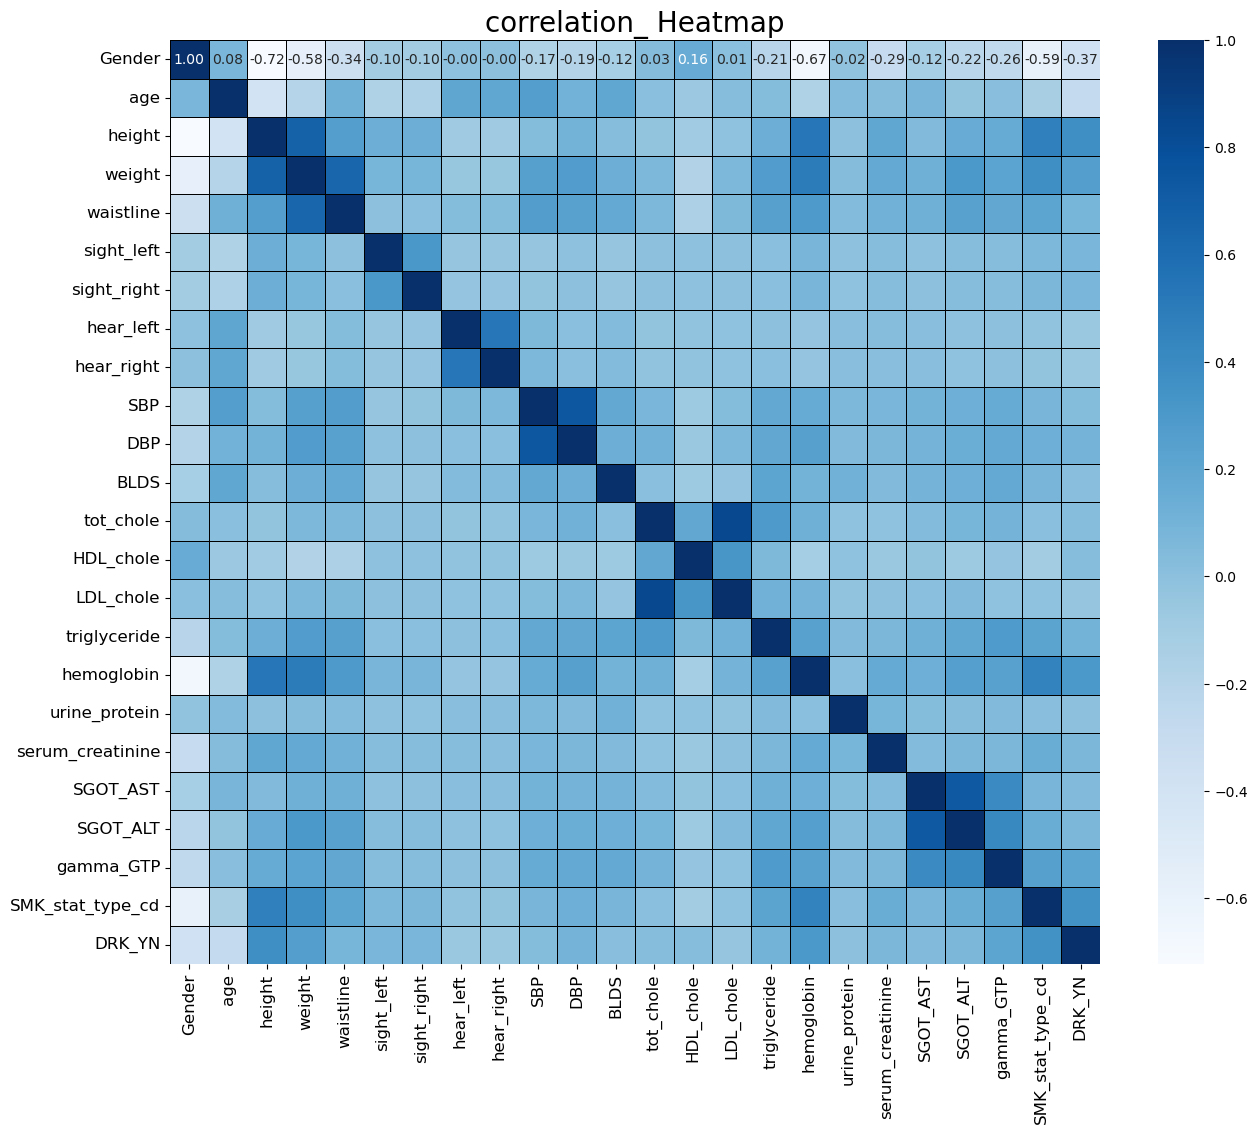

In [59]:
correlation_matrix = smoke_and_drink_df.corr()

plt.figure(figsize=(15, 12)) 
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='Blues', linewidths=0.5, linecolor='black', annot_kws={"size": 10})
plt.title('correlation_ Heatmap', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### *Notable correlations:*
##### *Correlations r > 0.2:*

**Smoking:**
- SMK_stat_type_cd - Gender 
- SMK_stat_type_cd - height
- SMK_stat_type_cd - waistline
- SMK_stat_type_cd - weight
- SMK_stat_type_cd - triglyceride
- SMK_stat_type_cd - hemoglobin
- SMK_stat_type_cd - gamma_GTP
- SMK_stat_type_cd - DRK_YN

**Drinking:**
- DRK_YN - Gender
- DRK_YN - age
- DRK_YN - height
- DRK_YN - weight
- DRK_YN - hemoglobin
- DRK_YN - gamma_GTP
- DRK_YN - SMK_stat_type_cd




#### *Division by age:*

#### Identification of the dominant age group among the subjects

<Axes: xlabel='age', ylabel='count'>

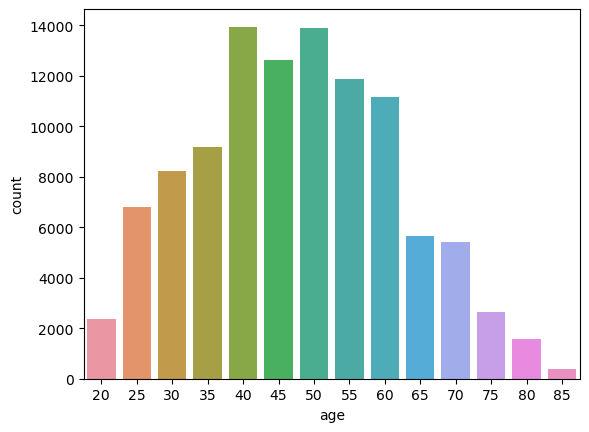

In [64]:
sns.countplot(x='age', data=smoke_and_drink_df)

#### Adding a column and group to age groups

In [66]:
def age (series):
    if series <= 35:
        return "20-35"
    elif 35 < series <= 50:
        return "35-50"
    elif 50 < series < 65:
        return "50-65"
    elif 65 <= series:
        return "65+"

In [67]:
smoke_and_drink_df["age_group"] = 0
smoke_and_drink_df["age_group"] = smoke_and_drink_df["age"].apply(age)
smoke_and_drink_df["age_group"].unique()

array(['20-35', '35-50', '50-65', '65+'], dtype=object)

<Axes: xlabel='age_group', ylabel='count'>

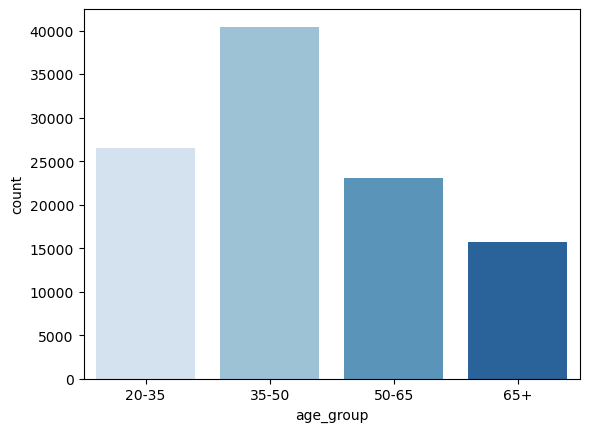

In [68]:
sns.countplot(x = 'age_group', data=smoke_and_drink_df, palette="Blues")

#### *Notable ages:*

#### The dominant group in the test appears to be 35-50

#### *Part Two Summary:*

#### In this section we made initial analysis using data visualization and statistical techniques
#### so we can see our dataset characterizations  in order to better understand the nature of our data.
#### From the information that emerged in this section, we would like to examine in depth the following correlations:
#### 1) Drinking and smoking 
#### 2) Drinking and smoking & height and weight (BMI)
#### 3) alcohol & cholesterol
#### 4) General Health Index - Smokers
#### 5) The effect of smoking on vision
#### In our examination of each correlation, we will consider the variables of age and gender.


 <div style="height: 1px; width: 100%; border-top: 1px solid black;"></div>

## Part Three:

### Data Analysis:

#### Analyzing the chosen data and examinning the nature of the correlations.

#### *Drinking and smoking:  correlation examining*

#### Examining overlap between smoking and drinking subjects

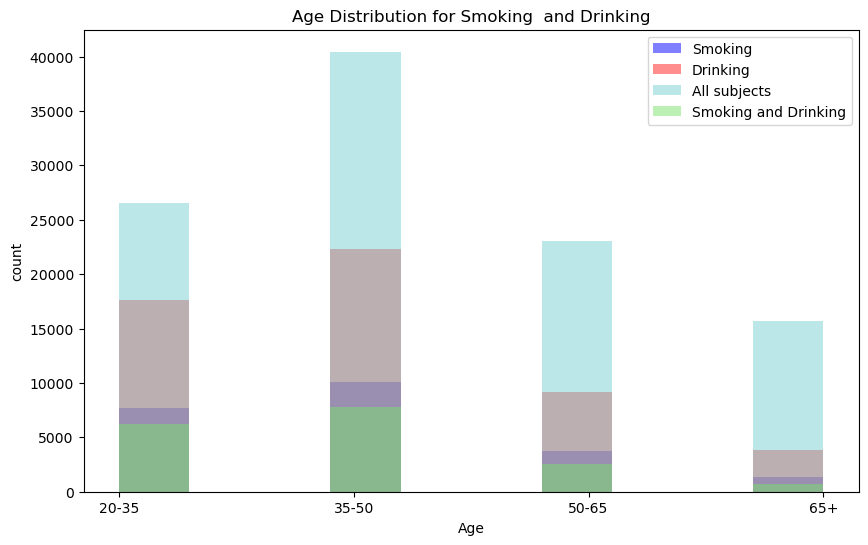

In [79]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

ax.hist(smoke_and_drink_df[smoke_and_drink_df.SMK_stat_type_cd == 3].age_group, color="b", alpha=0.5, label="Smoking")
ax.hist(smoke_and_drink_df[smoke_and_drink_df.DRK_YN == 1].age_group, color="#FF1D1D", alpha=0.5, label="Drinking")
ax.hist(smoke_and_drink_df.age_group, color="#79D1D5", alpha=0.5, label="All subjects")
ax.hist(smoke_and_drink_df[(smoke_and_drink_df['SMK_stat_type_cd'] == 3) & (smoke_and_drink_df['DRK_YN'] == 1)]['age_group'], color="#7AE26C", alpha=0.5, label="Smoking and Drinking")
ax.legend()
ax.set_title('Age Distribution for Smoking  and Drinking')
ax.set_xlabel('Age')
ax.set_ylabel('count')

plt.show()

##### It can be seen that there is only partial overlap in the total number of people between smokers and people who drink. Most smokers also Drink alcohol but not vice versa. Over all, it should be considered three separate groups.

### Drinking and smoking & height and weight


##### Examining the relationship between height and weight to smoking and drinking

##### The relationship between height and weight can be represented by 'BMI',
##### which is the ratio between these two variables. We will use BMI to examin the correlation.

##### Labeling each subjects' physical health condition according to the BMI index:

- **Underweight**: BMI less than 18.5
- **Normal Weight**: BMI between 18.5 and 24.9
- **Overweight**: BMI between 25 and 29.9
- **Obesity**: BMI 30 and above


Convert back numbers to string

In [86]:
smoke_and_drink_df['gender'] = smoke_and_drink_df['Gender'].map({0: 'Male', 1: 'Female'})

##### Create BMI groups

In [88]:
def BMI (series):
    if series < 18.5:
        return "underweight"
    elif 18.5 <= series <= 24.9:
        return "healthy weight"
    elif 25 <= series <= 29.9:
        return "overweight"
    elif 29.9 < series:
        return "obesity"
    

##### Calculation of BMI

In [90]:
smoke_and_drink_df["BMI"] = 0
i = 0
while i < 105696: 
    a = smoke_and_drink_df.loc[i,"height"]
    b = smoke_and_drink_df.loc[i,"weight"]
    c = a/100
    d = b/(c*c)
    smoke_and_drink_df.loc[i,"BMI_value"] = d
    i += 1
smoke_and_drink_df["BMI"] = smoke_and_drink_df["BMI_value"].apply(BMI)

##### Rearrange the columns

In [92]:
new_order = ['gender', 'age',"age_group", 'height', 'weight','BMI_value', 'BMI',  'waistline', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN'] 
smoke_and_drink_df = smoke_and_drink_df.reindex(columns=new_order)
smoke_and_drink_df

,gender,age,age_group,height,weight,BMI_value,BMI,waistline,sight_left,sight_right,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,20-35,170,75,25.951557,overweight,90.0,1.0,1.0,...,126,92,17.1,1,1.0,21,35,40,1,1
1,Male,30,20-35,180,80,24.691358,healthy weight,89.0,0.9,1.2,...,148,121,15.8,1,0.9,20,36,27,3,0
2,Male,40,35-50,165,75,27.548209,overweight,91.0,1.2,1.5,...,74,104,15.8,1,0.9,47,32,68,1,0
3,Male,50,35-50,175,80,26.122449,overweight,91.0,1.5,1.2,...,104,106,17.6,1,1.1,29,34,18,1,0
4,Male,50,35-50,165,60,22.038567,healthy weight,80.0,1.0,1.2,...,117,104,13.8,1,0.8,19,12,25,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105691,Female,60,50-65,150,50,22.222222,healthy weight,75.0,1.0,0.8,...,66,93,12.4,1,0.5,25,14,10,1,0
105692,Female,30,20-35,155,55,22.892820,healthy weight,76.2,0.7,0.8,...,81,38,12.1,1,0.8,19,11,12,1,1
105693,Male,65,65+,165,65,23.875115,healthy weight,82.0,0.4,0.9,...,154,87,14.0,1,1.0,30,22,20,1,1
105694,Male,25,20-35,170,60,20.761246,healthy weight,72.0,1.2,1.5,...,102,54,16.5,1,1.1,19,17,17,1,1


##### age & Gender - BMI

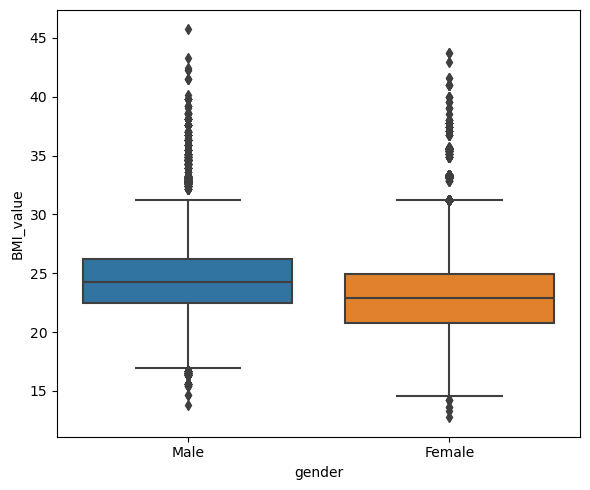

In [94]:
fig, axes = plt.subplots( figsize=(6, 5))


sns.boxplot(y="BMI_value", x="gender", data=smoke_and_drink_df)

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()

##### Comparing smoking and drinking people vs. people who don't smoke and drink and their BMI statuse.

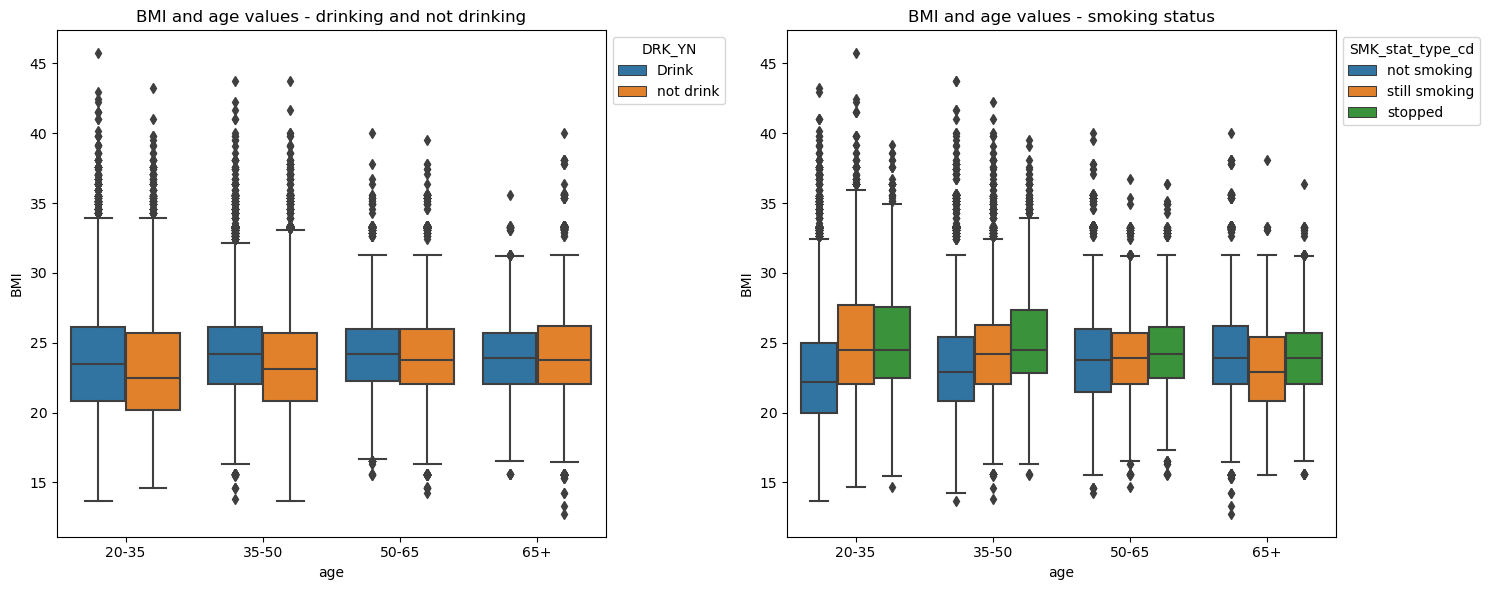

In [96]:
# יצירת גרף הראשון - על ערכי BMI בהתאם לגיל ולמצב שתייה
plt.figure(figsize=(15, 6))
ax1 = plt.subplot(1, 2, 1)
sns.boxplot(y='BMI_value', x='age_group', hue='DRK_YN', data=smoke_and_drink_df.replace({'DRK_YN': {0: 'not drink', 1: 'Drink'}}))
plt.title('BMI and age values - drinking and not drinking')
plt.xlabel('age')
plt.ylabel('BMI')

# הצגת המקרא מחוץ לגרף
plt.legend(title='DRK_YN', loc='upper left', bbox_to_anchor=(1, 1))

# יצירת גרף השני - על ערכי BMI בהתאם לגיל ולמצב עישון
ax2 = plt.subplot(1, 2, 2)
sns.boxplot(y='BMI_value', x='age_group', hue='SMK_stat_type_cd', data=smoke_and_drink_df.replace({'SMK_stat_type_cd': {1: 'not smoking', 2: 'stopped', 3: 'still smoking'}}))
plt.title('BMI and age values - smoking status')
plt.xlabel('age')
plt.ylabel('BMI')

# הצגת המקרא מחוץ לגרף
plt.legend(title='SMK_stat_type_cd', loc='upper left', bbox_to_anchor=(1, 1))

# הצגת הגרפים
plt.tight_layout()
plt.show()

##### Make sure the values are correct

In [98]:
smokers_over_65 = smoke_and_drink_df[(smoke_and_drink_df['age'] >= 65) & (smoke_and_drink_df['SMK_stat_type_cd'].isin([2]))]
max_bmi_smokers_over_65 = smokers_over_65['BMI_value'].max()
print(f'הערך המקסימלי של BMI בקבוצת אנשים מעל גיל 65 שמעשנים הוא: {max_bmi_smokers_over_65}')

הערך המקסימלי של BMI בקבוצת אנשים מעל גיל 65 שמעשנים הוא: 36.33217993079585


#### Graph of underweight

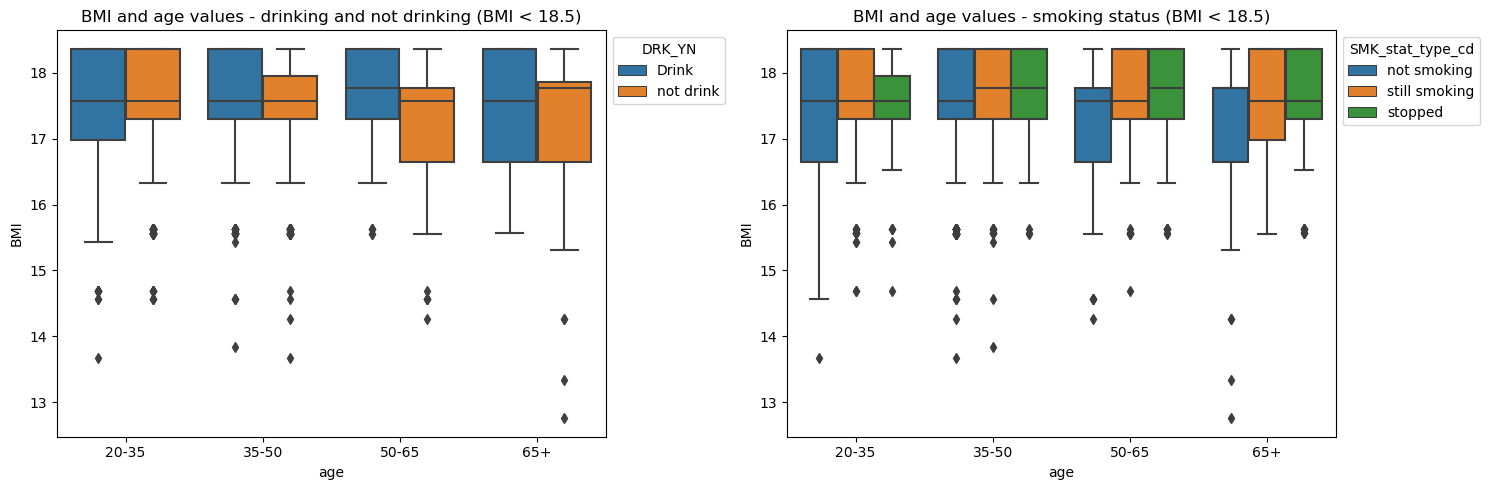

In [100]:
filtered_df = smoke_and_drink_df[smoke_and_drink_df['BMI_value'] < 18.5]

age_order = filtered_df['age_group'].sort_values().unique()

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y='BMI_value', x='age_group', hue='DRK_YN', data=filtered_df.replace({'DRK_YN': {0: 'not drink', 1: 'Drink'}}), order=age_order)
plt.title('BMI and age values - drinking and not drinking (BMI < 18.5)')
plt.xlabel('age')
plt.ylabel('BMI')
plt.legend(title='DRK_YN', loc='upper left', bbox_to_anchor=(1, 1))

plt.subplot(1, 2, 2)
sns.boxplot(y='BMI_value', x='age_group', hue='SMK_stat_type_cd', data=filtered_df.replace({'SMK_stat_type_cd': {1: 'not smoking', 2: 'stopped', 3: 'still smoking'}}), order=age_order)
plt.title('BMI and age values - smoking status (BMI < 18.5)')
plt.xlabel('age')
plt.ylabel('BMI')
plt.legend(title='SMK_stat_type_cd', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()



#### Conclusion from the graph:
##### From the graph of the BMI you can see that in the range of underweight:Graph of obesity

#### Graph of obesity

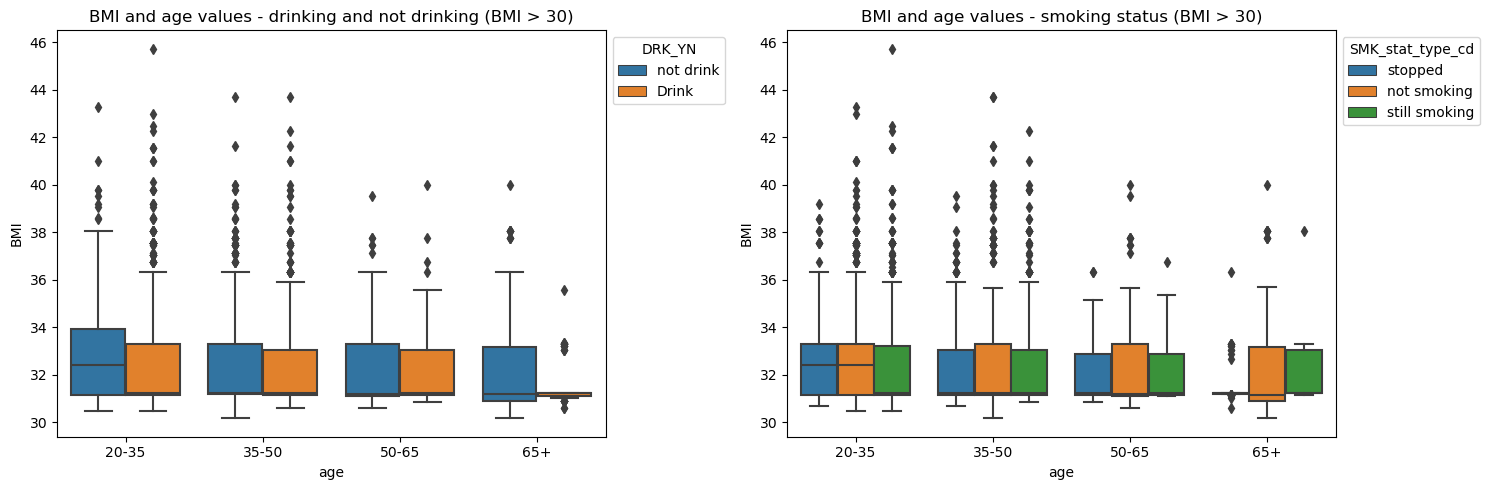

In [103]:
filtered_df = smoke_and_drink_df[smoke_and_drink_df['BMI_value'] > 30]
age_order = filtered_df['age_group'].sort_values().unique()

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y='BMI_value', x='age_group', hue='DRK_YN', data=filtered_df.replace({'DRK_YN': {0: 'not drink', 1: 'Drink'}}), order=age_order)
plt.title('BMI and age values - drinking and not drinking (BMI > 30)')
plt.xlabel('age')
plt.ylabel('BMI')
plt.legend(title='DRK_YN', loc='upper left', bbox_to_anchor=(1, 1))

plt.subplot(1, 2, 2)
sns.boxplot(y='BMI_value', x='age_group', hue='SMK_stat_type_cd', data=filtered_df.replace({'SMK_stat_type_cd': {1: 'not smoking', 2: 'stopped', 3: 'still smoking'}}), order=age_order)
plt.title('BMI and age values - smoking status (BMI > 30)')
plt.xlabel('age')
plt.ylabel('BMI')
plt.legend(title='SMK_stat_type_cd', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


#### conclusion:
##### From the graph of the BMI you can see that in the range of obesity:

 <div style="height: 1px; width: 100%; border-top: 1px solid black;"></div>

### alcohol & cholesterol


#### Examining the relationship between drinking and cholesterol

In [108]:
male_df = smoke_and_drink_df[smoke_and_drink_df["gender"] == "Male"]
female_df = smoke_and_drink_df[smoke_and_drink_df["gender"] == "Female"]



In [109]:
group_1 = male_df[male_df["age_group"] == "20-35"]
group_2 = male_df[male_df["age_group"] == "35-45"]
group_3 = male_df[male_df["age_group"] == "45-60"]
group_4 = male_df[male_df["age_group"] == "60+"]

<Figure size 2000x1200 with 0 Axes>

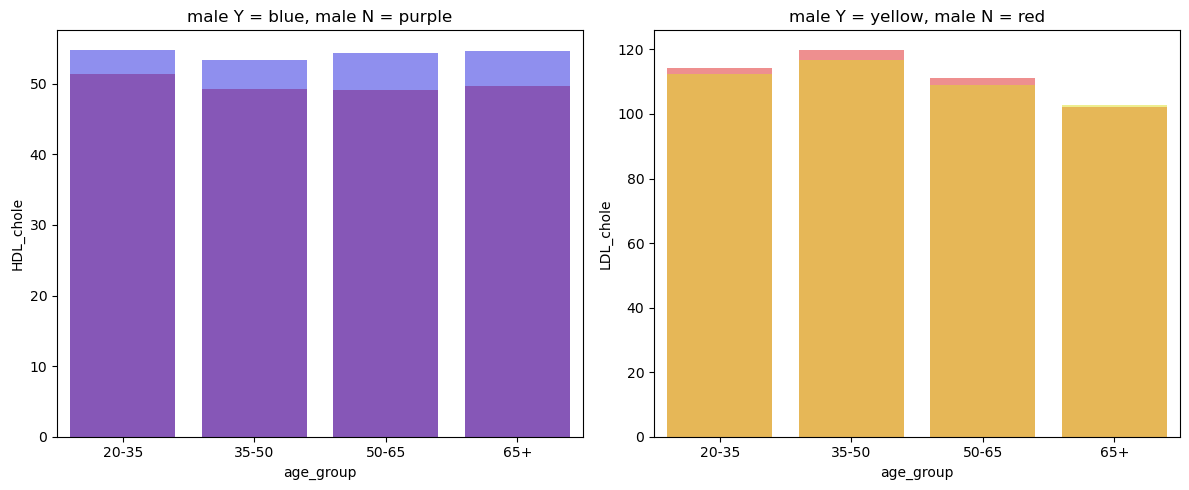

In [110]:
plt.figure(figsize=(20, 12))
fig, axes = plt.subplots(ncols = 2, figsize=(12, 5))

male_df1 = male_df[male_df["HDL_chole"]<300]
male_df1 = male_df1[male_df1["LDL_chole"]<300]
male_df1 = male_df1[male_df1["DRK_YN"] == 0]
male_df2 = male_df[male_df["HDL_chole"]<300]
male_df2 = male_df2[male_df2["LDL_chole"]<300]
male_df2 = male_df2[male_df2["DRK_YN"] == 1]

male_df1_av = male_df1.groupby('age_group')['HDL_chole'].mean()
male_df1_l_av = male_df1.groupby('age_group')['LDL_chole'].mean()

male_df2_av = male_df2.groupby('age_group')['HDL_chole'].mean()
male_df2_l_av = male_df2.groupby('age_group')['LDL_chole'].mean()


male_df1_av= male_df1_av.to_frame(name="HDL_chole").reset_index()
male_df1_l_av= male_df1_l_av.to_frame(name="LDL_chole").reset_index()

male_df2_av= male_df2_av.to_frame(name="HDL_chole").reset_index()
male_df2_l_av= male_df2_l_av.to_frame(name="LDL_chole").reset_index()


sns.barplot(ax=axes[0], x=male_df1_av["age_group"], y=male_df1_av["HDL_chole"], color='red', alpha=0.5)
sns.barplot(ax=axes[0], x=male_df2_av["age_group"], y=male_df2_av["HDL_chole"], color='blue', alpha=0.5)

sns.barplot(ax=axes[1], x=male_df1_l_av["age_group"], y=male_df1_l_av["LDL_chole"], color='red', alpha=0.5)
sns.barplot(ax=axes[1], x=male_df2_l_av["age_group"], y=male_df2_l_av["LDL_chole"], color='yellow', alpha=0.5)

axes[0].set_title('male Y = blue, male N = purple')
axes[1].set_title('male Y = yellow, male N = red')
plt.tight_layout()
plt.show()

ניתן לראות שבכל הגילאים הכולסטרול הטוב אצל הגברים ששותים גבוה יותר בפער משמעותי בגילאים המבוגרים

<Figure size 2000x1200 with 0 Axes>

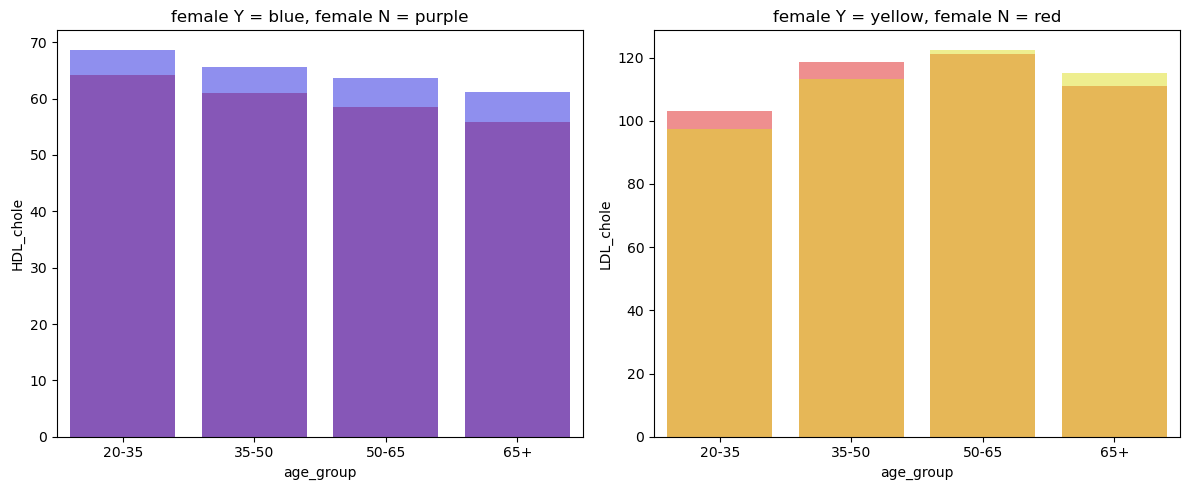

In [112]:
plt.figure(figsize=(20, 12))
fig, axes = plt.subplots(ncols = 2, figsize=(12, 5))

female_df1 = female_df[female_df["HDL_chole"]<300]
female_df1 = female_df1[female_df1["LDL_chole"]<300]
female_df1 = female_df1[female_df1["DRK_YN"] == 0]
female_df2 = female_df[female_df["HDL_chole"]<300]
female_df2 = female_df2[female_df2["LDL_chole"]<300]
female_df2 = female_df2[female_df2["DRK_YN"] == 1]

female_df1_av = female_df1.groupby('age_group')['HDL_chole'].mean()
female_df1_l_av = female_df1.groupby('age_group')['LDL_chole'].mean()

female_df2_av = female_df2.groupby('age_group')['HDL_chole'].mean()
female_df2_l_av = female_df2.groupby('age_group')['LDL_chole'].mean()


female_df1_av= female_df1_av.to_frame(name="HDL_chole").reset_index()
female_df1_l_av= female_df1_l_av.to_frame(name="LDL_chole").reset_index()

female_df2_av= female_df2_av.to_frame(name="HDL_chole").reset_index()
female_df2_l_av= female_df2_l_av.to_frame(name="LDL_chole").reset_index()


sns.barplot(ax=axes[0], x=female_df1_av["age_group"], y=female_df1_av["HDL_chole"], color='red', alpha=0.5)
sns.barplot(ax=axes[0], x=female_df2_av["age_group"], y=female_df2_av["HDL_chole"], color='blue', alpha=0.5)

sns.barplot(ax=axes[1], x=female_df1_l_av["age_group"], y=female_df1_l_av["LDL_chole"], color='red', alpha=0.5)
sns.barplot(ax=axes[1], x=female_df2_l_av["age_group"], y=female_df2_l_av["LDL_chole"], color='yellow', alpha=0.5)

axes[0].set_title('female Y = blue, female N = purple')
axes[1].set_title('female Y = yellow, female N = red')
plt.tight_layout()
plt.show()

ניתן לראות שבכל הגילאים הכולסטרול הטוב אצל הנשים ששותות גבוה יותר בפער הולך וגבר עם השנים,

 <div style="height: 1px; width: 100%; border-top: 1px solid black;"></div>

## General Health Index - Smokers

<a id='top'></a>

<div>
<img src="https://github.com/reuvenwel/project-1/blob/main/photo%202.jpg?raw=true" width="500"/>
</div>


נבדוק ממוצע בריאות שמבוסס על מספר מדדים בין אנשים מעשנים לבין כאלה שלא על ידי נתינת משקל שונה לכל מדד

#### health score calculation

new DataFrame

In [250]:
df = pd.DataFrame(smoke_and_drink_df)

#### Define scoring functions for each index

In [253]:

weights = {
    'BMI_value': 2.0,
    'hear_left': 0.3,
    'hear_right': 0.3,
    'SBP': 2.0,
    'DBP': 2.0,
    'BLDS': 2.0,
    'tot_chole': 1.8,
    'HDL_chole': 1.8,
    'LDL_chole': 1.8,
    'triglyceride': 1.8,
    'hemoglobin': 1.5,
    'urine_protein': 1.2,
    'serum_creatinine': 1.5,
    'SGOT_AST': 1.0,
    'SGOT_ALT': 1.0,
    'gamma_GTP': 1.0
}


#### Define scoring functions for each index

In [256]:

def score_bmi(value, weight):
    if value < 18.5: return 2 * weight
    elif value < 24.9: return 10 * weight
    elif value < 29.9: return 5 * weight
    else: return 1 * weight

def score_hearing(value, weight):
    if value < 25: return 10 * weight
    elif value < 40: return 8 * weight
    elif value < 55: return 5 * weight
    else: return 2 * weight

def score_sbp(value, weight):
    if value < 120: return 10 * weight
    elif value < 130: return 8 * weight
    elif value < 140: return 5 * weight
    else: return 1 * weight

def score_dbp(value, weight):
    if value < 80: return 10 * weight
    elif value < 90: return 8 * weight
    elif value < 100: return 5 * weight
    else: return 1 * weight

def score_blds(value, weight):
    if value < 100: return 10 * weight
    elif value < 125: return 8 * weight
    else: return 1 * weight

def score_tot_chole(value, weight):
    if value < 200: return 10 * weight
    elif value < 240: return 5 * weight
    else: return 1 * weight

def score_hdl_chole(value, weight):
    if value > 60: return 10 * weight
    elif value > 40: return 5 * weight
    else: return 1 * weight

def score_ldl_chole(value, weight):
    if value < 100: return 10 * weight
    elif value < 130: return 5 * weight
    else: return 1 * weight

def score_triglyceride(value, weight):
    if value < 150: return 10 * weight
    elif value < 200: return 5 * weight
    else: return 1 * weight

def score_hemoglobin(value, weight):
    if value > 13.5: return 10 * weight
    elif value > 12: return 5 * weight
    else: return 1 * weight

def score_urine_protein(value, weight):
    if value == 0: return 10 * weight
    elif value == 1: return 5 * weight
    else: return 1 * weight

def score_serum_creatinine(value, weight):
    if value < 1.2: return 10 * weight
    elif value < 1.5: return 5 * weight
    else: return 1 * weight

def score_sgot_ast(value, weight):
    if value < 40: return 10 * weight
    elif value < 56: return 5 * weight
    else: return 1 * weight

def score_sgot_alt(value, weight):
    if value < 40: return 10 * weight
    elif value < 56: return 5 * weight
    else: return 1 * weight

def score_gamma_gtp(value, weight):
    if value < 51: return 10 * weight
    elif value < 71: return 5 * weight
    else: return 1 * weight


#### Define a dictionary for scoring functions

In [259]:

scoring_functions = {
    'BMI_value': score_bmi,
    'hear_left': score_hearing,
    'hear_right': score_hearing,
    'SBP': score_sbp,
    'DBP': score_dbp,
    'BLDS': score_blds,
    'tot_chole': score_tot_chole,
    'HDL_chole': score_hdl_chole,
    'LDL_chole': score_ldl_chole,
    'triglyceride': score_triglyceride,
    'hemoglobin': score_hemoglobin,
    'urine_protein': score_urine_protein,
    'serum_creatinine': score_serum_creatinine,
    'SGOT_AST': score_sgot_ast,
    'SGOT_ALT': score_sgot_alt,
    'gamma_GTP': score_gamma_gtp
}


#### applay scoring with weights

In [262]:
for index, func in scoring_functions.items():
    weight = weights[index]
    df[index + '_score'] = df[index].apply(lambda x: func(x, weight))

#### prevent existing of "nan" value

In [265]:
score_columns = [col for col in df.columns if col.endswith('_score')]
df[score_columns] = df[score_columns].fillna(0)

#### Calculate the average score

In [268]:

total_weight = sum(weights.values())
df['average_score'] = df[score_columns].sum(axis=1) / total_weight


#### insert average score to smoking df

In [271]:
smoke_and_drink_df['average_score'] = df['average_score']  

#### check

In [275]:
df ['average_score'].unique()

array([8.5447522 , 7.80844908, 8.68110463, ..., 5.0132243 , 5.03140462,
       3.4133558 ])

#### הצגה גרפית

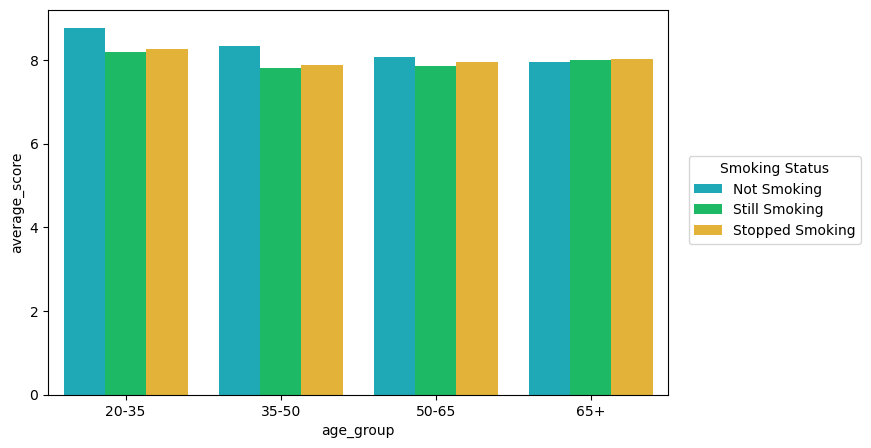

In [277]:
custom_palette = ["#06BDD0", "#03D361", "#FFBE1D"]  # Coral, Royal Blue, Lime Green

fig, axes = plt.subplots(figsize=(8, 5))
smoke_and_drink_df['SMK_stat_type_cd'] = smoke_and_drink_df['SMK_stat_type_cd'].astype(str) #החלפה ל STRNG 
sns.barplot(data=smoke_and_drink_df, x='age_group', y='average_score', hue='SMK_stat_type_cd', errorbar=None, palette=custom_palette)

legend_labels = {'1': 'Not Smoking', '2': 'Stopped Smoking', '3': 'Still Smoking'}
handles, labels = axes.get_legend_handles_labels()
labels = [legend_labels[label] for label in labels]

axes.legend_.remove()
fig.legend(handles, labels, title="Smoking Status", loc='center right', bbox_to_anchor=(1.15, 0.5))

plt.show()


#### ניתן לראות שלמעט הגילאים המאוחרים 60+ בהם ייתכנו שינויים אחרים שיביאו להבדל, בטווחי הגילאים האחרים רמת הבריאות הכללית של ה"לא מעשנים" גבוהה  

 <div style="height: 1px; width: 100%; border-top: 1px solid black;"></div>

## The effect of smoking on vision

<span style="color: green;">Testing in men</span>


נפרק לשולשה קבצים שונים את שלושת קבוצות העישון 

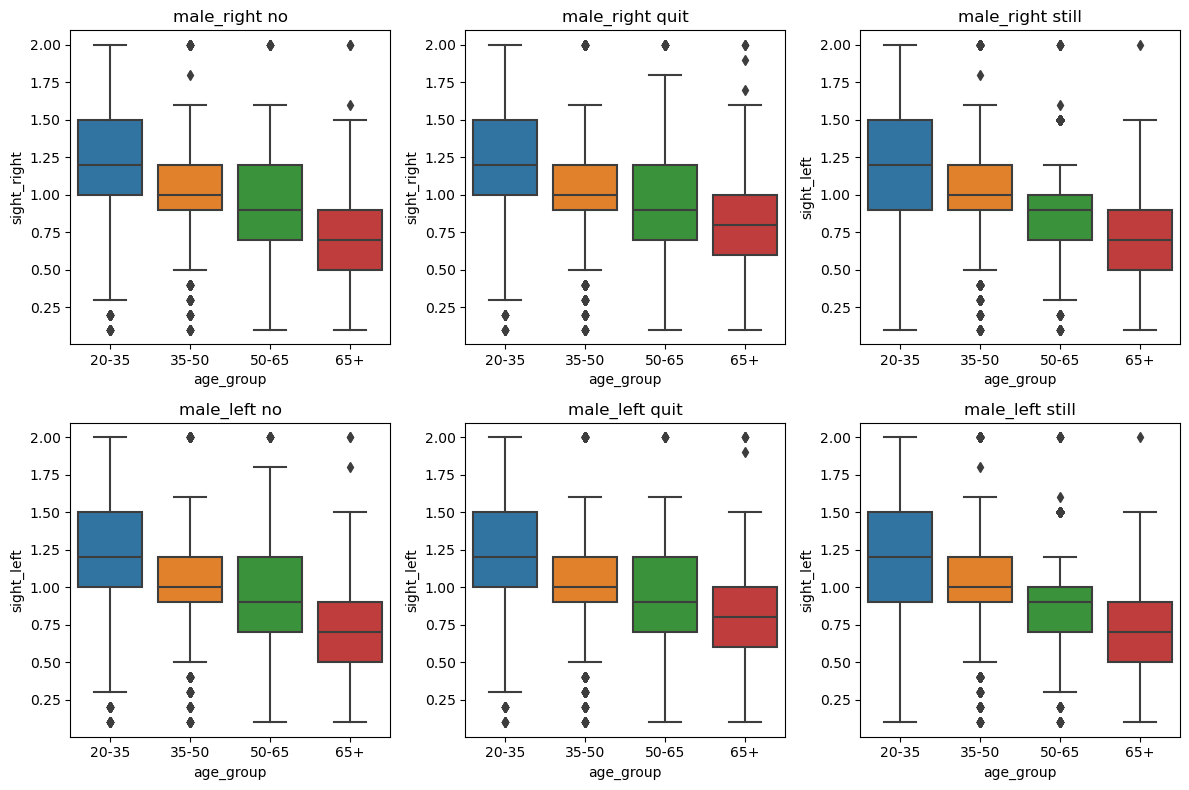

In [193]:
sight_male_df10 = male_df[male_df["sight_right"]<8.0]
sight_male_df10 = sight_male_df10[sight_male_df10["sight_left"]<8.0]
sight_male_df_non = sight_male_df10[sight_male_df10["SMK_stat_type_cd"] == 1]
sight_male_df_quit = sight_male_df10[sight_male_df10["SMK_stat_type_cd"] == 2]
sight_male_df_still = sight_male_df10[sight_male_df10["SMK_stat_type_cd"] == 3]



fig, axes = plt.subplots(2,3, figsize=(12, 8))
plt.subplots_adjust(wspace = 0.6)
categories = ["20-35","35-50","50-65","65+"]
sns.boxplot(x='age_group', y='sight_right', data=sight_male_df_non, order = categories ,ax = axes[0,0])
sns.boxplot(x='age_group', y='sight_left', data=sight_male_df_non, order = categories, ax = axes[1,0])
sns.boxplot(x='age_group', y='sight_right', data=sight_male_df_quit, order = categories, ax = axes[0,1])
sns.boxplot(x='age_group', y='sight_left', data=sight_male_df_quit, order = categories, ax = axes[1,1])
sns.boxplot(x='age_group', y='sight_left', data=sight_male_df_still, order = categories, ax = axes[0,2])
sns.boxplot(x='age_group', y='sight_left', data=sight_male_df_still, order = categories, ax = axes[1,2])

axes[0,0].set_title('male_right no')
axes[1,0].set_title('male_left no')
axes[0,1].set_title('male_right quit')
axes[1,1].set_title('male_left quit')
axes[0,2].set_title('male_right still')
axes[1,2].set_title('male_left still')

plt.tight_layout()
plt.show()

ניתן לראות ירידה מסויימת דווקא אצל הנשים שעישנו והפסיקו, אך מכיוון שקבוצה זאת יחסית קטנה ויכולה להיות מושפעת מגורמים רבים נוספים, בסטייה קטנה קשה להגיע למסקנה חותכת

In [197]:
sight_female_df10 = female_df[female_df["sight_right"]<8.0]
sight_female_df10 = sight_female_df10[sight_female_df10["sight_left"]<8.0]
sight_female_df_non = sight_female_df10[sight_female_df10["SMK_stat_type_cd"] == 1]
sight_female_df_quit = sight_female_df10[sight_female_df10["SMK_stat_type_cd"] == 2]
sight_female_df_still = sight_female_df10[sight_female_df10["SMK_stat_type_cd"] == 3]


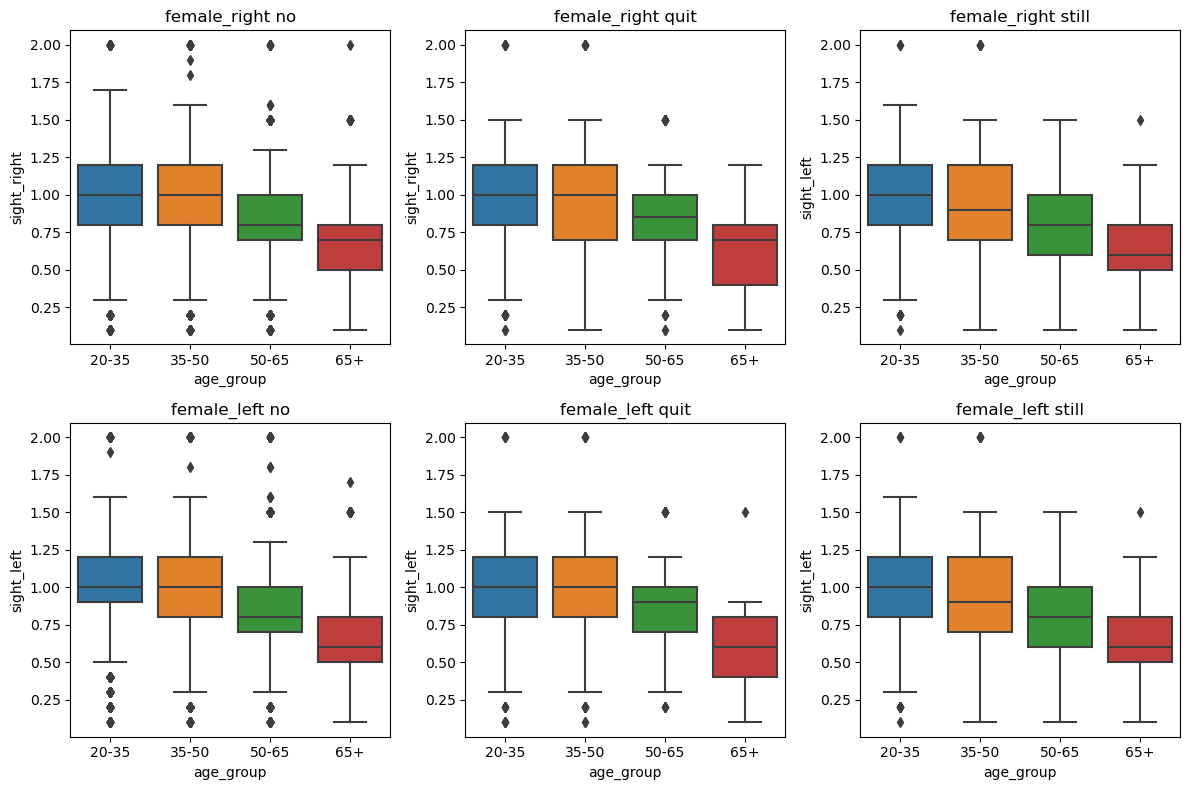

In [199]:



fig, axes = plt.subplots(2,3, figsize=(12, 8))
plt.subplots_adjust(wspace = 0.6)
categories = ["20-35","35-50","50-65","65+"]
sns.boxplot(x='age_group', y='sight_right', data=sight_female_df_non, order = categories ,ax = axes[0,0])
sns.boxplot(x='age_group', y='sight_left', data=sight_female_df_non, order = categories, ax = axes[1,0])
sns.boxplot(x='age_group', y='sight_right', data=sight_female_df_quit, order = categories, ax = axes[0,1])
sns.boxplot(x='age_group', y='sight_left', data=sight_female_df_quit, order = categories, ax = axes[1,1])
sns.boxplot(x='age_group', y='sight_left', data=sight_female_df_still, order = categories, ax = axes[0,2])
sns.boxplot(x='age_group', y='sight_left', data=sight_female_df_still, order = categories, ax = axes[1,2])

axes[0,0].set_title('female_right no')
axes[1,0].set_title('female_left no')
axes[0,1].set_title('female_right quit')
axes[1,1].set_title('female_left quit')
axes[0,2].set_title('female_right still')
axes[1,2].set_title('female_left still')

plt.tight_layout()
plt.show()

ניתן לראות ירידה מסויימת דווקא אצל הנשים שעישנו והפסיקו, אך מכיוון שקבוצה זאת יחסית קטנה ויכולה להיות מושפעת מגורמים רבים נוספים, בסטייה קטנה קשה להגיע למסקנה חותכת

בעיקבות השוואת הראיה בין נשים מעשנות לגברים מעשנים ניתן היה לראות ממוצע ראיה נמוך יותר של נשים בכל הקטגוריות וזה הובל לבדיקה של גברים מול נשים בראיה

Average sight by age group

In [204]:
smoke_and_drink_df["sight"] = (smoke_and_drink_df["sight_right"] + smoke_and_drink_df["sight_left"]) / 2
data_df_sight = smoke_and_drink_df.groupby(["age_group","gender"])["sight"].mean()
data_df_sight= data_df_sight.to_frame(name="data_df_sight").reset_index()
data_df_sight_named = data_df_sight.rename(columns={"data_df_sight": "sight_mean"})
data_df_sight_named

,age_group,gender,sight_mean
0,20-35,Female,1.030656
1,20-35,Male,1.130712
2,35-50,Female,0.972163
3,35-50,Male,1.080399
4,50-65,Female,0.852103
5,50-65,Male,0.957048
6,65+,Female,0.730076
7,65+,Male,0.848133


Average height by age group

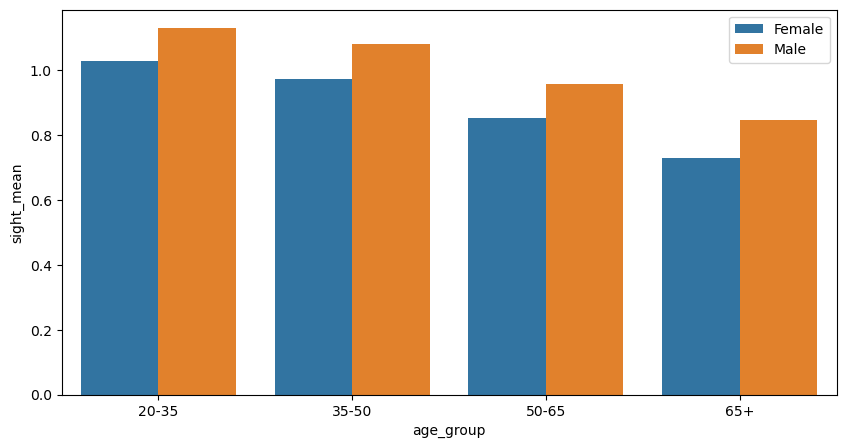

In [207]:
fig, axes = plt.subplots(figsize=(10, 5))
sns.barplot(data = data_df_sight_named, x='age_group', y='sight_mean', hue = 'gender',errorbar=None,)
plt.legend(title="", loc=('upper right')) 
plt.show()

In [209]:
באיכות הראייה ניתן לראות פער בכל הגילאים בין גברים לנשים, אך ההתדרדרות נעשית באותו קצב בסופו של דבר
בגובה ניתן לראות שהדעיכה גם אצל גברים וגם אצל נשים מתחילה בקבוצת הגיל השנייה 

SyntaxError: invalid syntax (3527843372.py, line 1)